In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV

from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LassoCV

import matplotlib.pyplot as plt
import time
import scipy
pd.options.display.float_format = "{:,.4f}".format

%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
X = scipy.sparse.load_npz('data/train_steps_vec.npz')

In [4]:
test = scipy.sparse.load_npz('data/test_steps_vec.npz')

In [5]:
test.shape

(10000, 17967)

In [6]:
data = pd.read_csv("data/recipe_train.csv")

In [7]:
testingSet = pd.read_csv("data/recipe_test.csv")

In [8]:
testingSet.shape

(10000, 8)

In [9]:
y = data["duration_label"]

In [10]:
y

0       2.0000
1       2.0000
2       2.0000
3       2.0000
4       2.0000
5       2.0000
6       2.0000
7       3.0000
8       2.0000
9       2.0000
10      1.0000
11      2.0000
12      2.0000
13      2.0000
14      2.0000
15      2.0000
16      2.0000
17      2.0000
18      2.0000
19      3.0000
20      2.0000
21      1.0000
22      1.0000
23      1.0000
24      1.0000
25      2.0000
26      2.0000
27      2.0000
28      1.0000
29      1.0000
         ...  
39970   1.0000
39971   1.0000
39972   2.0000
39973   1.0000
39974   1.0000
39975   1.0000
39976   3.0000
39977   1.0000
39978   2.0000
39979   2.0000
39980   3.0000
39981   2.0000
39982   2.0000
39983   3.0000
39984   1.0000
39985   2.0000
39986   1.0000
39987   1.0000
39988   1.0000
39989   2.0000
39990   1.0000
39991   1.0000
39992   1.0000
39993   1.0000
39994   1.0000
39995   1.0000
39996   2.0000
39997   1.0000
39998   2.0000
39999   2.0000
Name: duration_label, Length: 40000, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [12]:
vt = VarianceThreshold(0.01)
X_train = vt.fit_transform(X_train, y_train)
X_test = vt.transform(X_test)

In [13]:
X_vt = vt.fit_transform(X, y)

In [18]:
test_vt = vt.transform(test) 

In [14]:
print(X_vt.shape)

(40000, 888)


In [30]:
C= 3.7
k = 600

In [49]:
models = [GaussianNB(),
          MultinomialNB(),
          DecisionTreeClassifier(max_depth=1),
          DecisionTreeClassifier(max_depth=None),
          svm.LinearSVC(C=C),
          LogisticRegression()]
titles = ['GNB',
          'MNB',
          'one-r',
          'Decision Tree',
          'LinearSVC',
          'Logistic Regression']

In [28]:
x2 = SelectFdr(chi2, alpha = 0.01)
x2.fit(X_train,y_train)
X_train_x2 = x2.transform(X_train)
X_test_x2 = x2.transform(X_test)

In [53]:
print(X_train_x2.shape)

(32000, 757)


In [29]:
f = SelectFdr(f_classif, alpha = 0.01)
f.fit(X_train,y_train)
X_train_f = f.transform(X_train)
X_test_f = f.transform(X_test)

In [52]:
print(X_train_f.shape)

(32000, 705)


In [31]:
mi = SelectKBest(mutual_info_classif, k = k)
mi.fit(X_train,y_train)
X_train_mi = mi.transform(X_train)
X_test_mi = mi.transform(X_test)

In [32]:
print(X_train_mi.shape)

(32000, 600)


In [66]:
%%time
Xs = [(X_train, X_test), (X_train_x2, X_test_x2), (X_train_f, X_test_f), (X_train_mi, X_test_mi)]

X_names = ['complete', 'x2', 'f', 'mi']

for title, model in zip(titles, models):
    print('\n',title, '(with k=',k,'features):')
    for X_name, Xt in zip(X_names, Xs):
        X_train_t, X_test_t = Xt
        model.fit(X_train_t.todense(), y_train)
        acc = model.score(X_test_t.todense(), y_test)
        print(X_name, '\t acc',  acc)


 GNB (with k= 586 features):
complete 	 acc 0.511
x2 	 acc 0.56275
f 	 acc 0.6
mi 	 acc 0.616875

 MNB (with k= 586 features):
complete 	 acc 0.714875
x2 	 acc 0.71125
f 	 acc 0.709875
mi 	 acc 0.70825

 one-r (with k= 586 features):
complete 	 acc 0.65475
x2 	 acc 0.65475
f 	 acc 0.65475
mi 	 acc 0.65475

 Decision Tree (with k= 586 features):
complete 	 acc 0.72625
x2 	 acc 0.726375
f 	 acc 0.72425
mi 	 acc 0.72675

 LinearSVC (with k= 586 features):
complete 	 acc 0.788375
x2 	 acc 0.78975
f 	 acc 0.789875
mi 	 acc 0.788

 Logistic Regression (with k= 586 features):
complete 	 acc 0.7925
x2 	 acc 0.788125
f 	 acc 0.78975
mi 	 acc 0.793875
Wall time: 3min 22s


In [ ]:
models = [LogisticRegression(),
          Ridge(0.01),
          Lasso(0.01)]
titles = ['GNB',
          'MNB',
          'one-r',
          'Decision Tree',
          'LinearSVC',
          'Logistic Regression']

In [126]:
%%time
lst = []
model = LogisticRegression()
for k in range(500, 801, 25):
    mi = SelectKBest(mutual_info_classif, k = k)
    mi.fit(X_vt,y)
    X_vt_mi = mi.transform(X_vt)
    acc = cross_val_score(model, X_vt_mi, y, cv = 4)
    print(k, acc)
    lst.append(acc.mean())

500 [0.7924 0.7881 0.7957 0.7991]
525 [0.7911 0.7863 0.7962 0.7993]
550 [0.7911 0.7871 0.7949 0.798 ]
575 [0.7913 0.7869 0.7945 0.796 ]
600 [0.7925 0.7914 0.7982 0.8012]
625 [0.792  0.7916 0.7977 0.801 ]
650 [0.7923 0.7906 0.7988 0.8003]
675 [0.7924 0.7917 0.7995 0.7997]
700 [0.7928 0.7944 0.7998 0.7984]
725 [0.7931 0.7942 0.7997 0.7992]
750 [0.7932 0.7948 0.8001 0.8002]
775 [0.7912 0.7931 0.7994 0.7996]
800 [0.7925 0.7942 0.7998 0.8022]
Wall time: 2min 48s


In [44]:
plt.plot(range(500, 801, 25), lst)

NameError: name 'lst' is not defined

In [34]:
X_vt.shape

(40000, 888)

In [66]:
mi = SelectKBest(mutual_info_classif, k = 874)
X_vt_mi = mi.fit_transform(X_vt, y)
test_vt_mi = mi.transform(test_vt)

In [67]:
%%time
rc = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv = 5)
rc.fit(X_vt_mi, y)
rc_mi = rc.score(X_vt_mi,y)
rc_mi

Wall time: 10.7 s


0.802175

In [39]:
len(range(600, 889, 22))

14

In [64]:
%%time
score = []
for k in range(860, 888, 1):
    mi = SelectKBest(mutual_info_classif, k = k)
    mi.fit(X_vt,y)
    X_vt_mi = mi.transform(X_vt)
    rc.fit(X_vt_mi, y)
    acc = rc.score(X_vt_mi,y)
    print(k, acc)
    score.append(acc.mean())

860 0.801675
861 0.80165
862 0.801625
863 0.801725
864 0.801675
865 0.801675
866 0.802
867 0.8019
868 0.80215
869 0.80215
870 0.802075
871 0.802075
872 0.801925
873 0.80205
874 0.802175
875 0.80215
876 0.802075
877 0.80205
878 0.802125
879 0.802025
880 0.801975
881 0.801625
882 0.801675
883 0.801875
884 0.801775
885 0.8018
886 0.801775
887 0.80185
Wall time: 7min 20s


In [55]:
f.fit(X_vt, y)
X_vt_f = f.transform(X_vt)
rc.fit(X_vt_f, y)
rc_f = rc.score(X_vt_f,y)

In [50]:
print(X_vt_f.shape)

(40000, 734)


In [60]:
x2.fit(X_vt,y)
X_vt_x2 = x2.transform(X_vt)
test_vt_x2 = x2.transform(test_vt)
rc.fit(X_vt_x2, y)
rc_x2 = rc.score(X_vt_x2,y)
rc_x2

0.8004

In [51]:
print(X_vt_x2.shape)

(40000, 780)


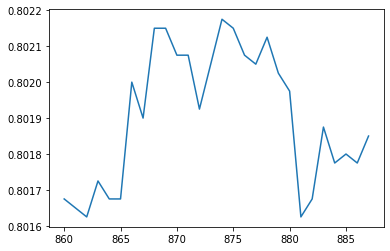

In [65]:
plt.plot(range(860, 888, 1), score)

In [22]:
rc_predicted=rc.predict(test_vt)

In [54]:
test_vt_f = f.transform(test_vt)
print(test_vt_f.shape)

(10000, 734)


In [62]:
rc_x2_predicted = rc.predict(test_vt_x2)

In [68]:
rc_mi_predicted = rc.predict(test_vt_mi)

In [ ]:
log_predicted = 

In [100]:
testingSet.index

RangeIndex(start=0, stop=10000, step=1)

In [69]:
predicted = pd.DataFrame({'id':testingSet.index+1, 'duration_label':rc_mi_predicted})
predicted.to_csv('predicted.csv', index = False)

In [113]:
predicted

,id,duration_label
0,1,2.0000
1,2,1.0000
2,3,1.0000
3,4,1.0000
4,5,2.0000
5,6,1.0000
6,7,2.0000
7,8,1.0000
8,9,1.0000
9,10,2.0000
